Shyam Kumar Ray Yadav (18449154)

Sonu Kumar (15651099)

Ahmad Raza Khawaja (25848862)

# Problem 1: Census data, Germany 2022.

In this problem, we work with census data obtained in Germany in 2022. The original data is
available at [https://www.zensus2022.de/EN/Census_results/_inhalt.html](https://www.zensus2022.de/EN/Census_results/_inhalt.html). But the data itself is only documented in German. Consequently, for the exam, we provide a translated and slightly preprocessed version of the data as ```census.csv``` with some documentation and metadata in ```census_description.pdf```.


## 1. **Import and pre-processing.** Import ```census.csv``` into Python as a pandas dataframe, process missing values and particular formatting issues and make sure that each column in the end has the appropriate data type. For this problem we will only work with data on the lowest regional level (municipality, German: `Gemeinde'). Filter the data accordingly.


In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

In [227]:
df = pd.read_csv('census.csv', sep=';', encoding='utf-8')
data

,name,regional_level,population_total,Sex_1,Sex_2,citizenship_1,citizenship_2,age_bracket_01,age_bracket_02,age_bracket_03,...,marital_status_1,marital_status_2,marital_status_3,marital_status_4,marital_status_5,migration_background_2,migration_background_21,migration_background_22,migration_background_3,migration_background_1
0,Deutschland,Bund,82719540,40674034,42045507,71806193,10913347,2295609,2390643,3072412,...,34765559,35181395,5687099,6355348,730137,18142064,15589690,2552372,1438808,63138669
1,Schleswig-Holstein,Land,2927542,1428581,1498962,2668988,258555,75193,80399,105410,...,1197086,1244415,209157,249151,27732,473967,408796,65167,36864,2416709
2,"Flensburg, Stadt",Stadtkreis/kreisfreie Stadt/Landkreis,95015,46834,48181,80294,14722,2587,2554,3149,...,47754,31308,5749,8709,1494,23516,20388,3131,1242,70262
3,"Flensburg, Stadt",Gemeinde,95015,46834,48181,80294,14722,2587,2554,3149,...,47754,31308,5749,8709,1494,23516,20388,3131,1242,70262
4,"Kiel, Landeshauptstadt",Stadtkreis/kreisfreie Stadt/Landkreis,249132,121818,127313,218560,30577,6698,6492,8294,...,130983,79206,14056,21361,3534,55074,46214,8858,3494,190565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12434,Langenleuba-Niederhain,Gemeinde,1722,877,845,1714,6,34,40,54,...,618,885,125,98,–,45,44,4,4,1672
12435,Nobitz,Gemeinde,7023,3504,3516,6968,57,130,173,253,...,2451,3508,613,440,7,195,184,8,15,6813
12436,"Schmölln, Stadt",Gemeindeverband,14118,6975,7151,13359,759,270,357,467,...,5280,6254,1280,1122,183,1164,1076,86,44,12912
12437,Dobitschen,Gemeinde,418,209,209,414,5,4,5,14,...,124,218,41,31,–,10,10,–,–,407


In [228]:
# 2. Process missing values and particular formatting issues
df = df.replace({'–': 0, '.': np.nan})

# 3. Ensure each column has the appropriate data type
# First two columns are strings, the rest should be numeric
df['name'] = df['name'].astype(str)
df['regional_level'] = df['regional_level'].astype(str)

numeric_columns = df.columns[2:]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. Filter the data to include only municipalities
df_municipalities = df[df['regional_level'] == 'Gemeinde']

# Display information about the processed DataFrame
print("DataFrame Info:")
print(df_municipalities.info())

print("\nFirst few rows:")
print(df_municipalities.head())

print("\nDescriptive statistics:")
print(df_municipalities.describe())

print("\nMissing values:")
print(df_municipalities.isnull().sum())

# Save the processed DataFrame to a new CSV file
df_municipalities.to_csv('processed_census_municipalities.csv', index=False)
print("\nProcessed data saved to 'processed_census_municipalities.csv'")

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 10786 entries, 3 to 12438
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     10786 non-null  object 
 1   regional_level           10786 non-null  object 
 2   population_total         10786 non-null  int64  
 3   Sex_1                    10786 non-null  int64  
 4   Sex_2                    10786 non-null  int64  
 5   citizenship_1            10786 non-null  int64  
 6   citizenship_2            10786 non-null  int64  
 7   age_bracket_01           10785 non-null  float64
 8   age_bracket_02           10785 non-null  float64
 9   age_bracket_03           10785 non-null  float64
 10  age_bracket_04           10785 non-null  float64
 11  age_bracket_05           10785 non-null  float64
 12  age_bracket_06           10785 non-null  float64
 13  age_bracket_07           10785 non-null  float64
 14  age_bracket

We can see here that our data is not cleaned. Except for the column "name" and "regional_level", all other data types should be integers. However, our datatypes are not conveying that message. Also, we can visualize through our data that we have a total of 8567 missing values that are filled with the value "-" and ".". Thus, we now want to convert our data frame into their relevant data type and remove the missing values. 

Thus, we have now filtered data for the lowest regional level, converted the columns into their respective data types, and removed the null values. Now, we can work on the filtered data for the further processes. 

## 2. **Analysis with respect to municipality size.** First, we analyze the variation of municipalities with respect to their size (=number of inhabitants).

(a) Show the distribution of municipalities with respect to size. (1 chart)

                      name  population_total
0                     Aach            1096.0
1              Aach, Stadt            2285.0
2            Aachen, Stadt          261178.0
3             Aalen, Stadt           67139.0
4                Aarbergen            6225.0
...                    ...               ...
10410            Üdersdorf            1094.0
10411  Ühlingen-Birkendorf            5203.0
10412                Ürzig             877.0
10413              Üttfeld             397.0
10414               Üxheim            1349.0

[10415 rows x 2 columns]


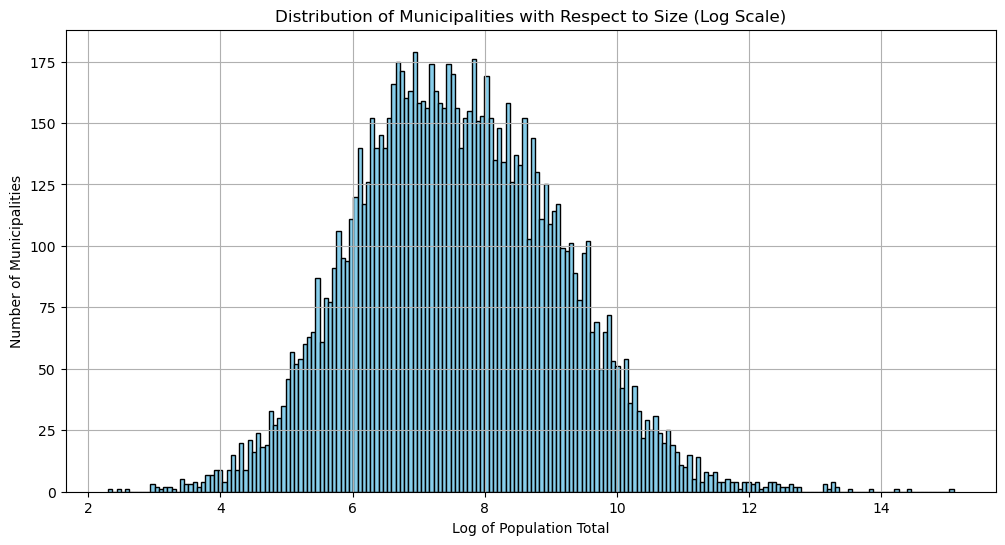

In [229]:
# Load the processed data
processed_data = pd.read_csv('processed_census_municipalities.csv')

#Aggregate the total population by the municipality name. 
population_sum_muni = processed_data.groupby('name')['population_total'].mean().reset_index()

print(population_sum_muni)

#Sorting the data summed by total_population for better visualization. 
population_sum_muni.sort_values(by = 'population_total', ascending = True, inplace = True)

# Apply logarithmic transformation to the population total
population_sum_muni['log_population_total'] = np.log1p(population_sum_muni['population_total'])

# Plotting the distribution of municipalities with respect to size using logarithmic scale
plt.figure(figsize=(12, 6))
plt.hist(population_sum_muni['log_population_total'], bins=200, edgecolor='black', color='skyblue')
plt.title('Distribution of Municipalities with Respect to Size (Log Scale)')
plt.xlabel('Log of Population Total')
plt.ylabel('Number of Municipalities')
plt.grid(True)
plt.show()

## (b) Analyze and visualize the relation between the fraction of non-German inhabitants and municipality size. There is a noticeable trend, and your charts should represent it clearly. (2 charts)


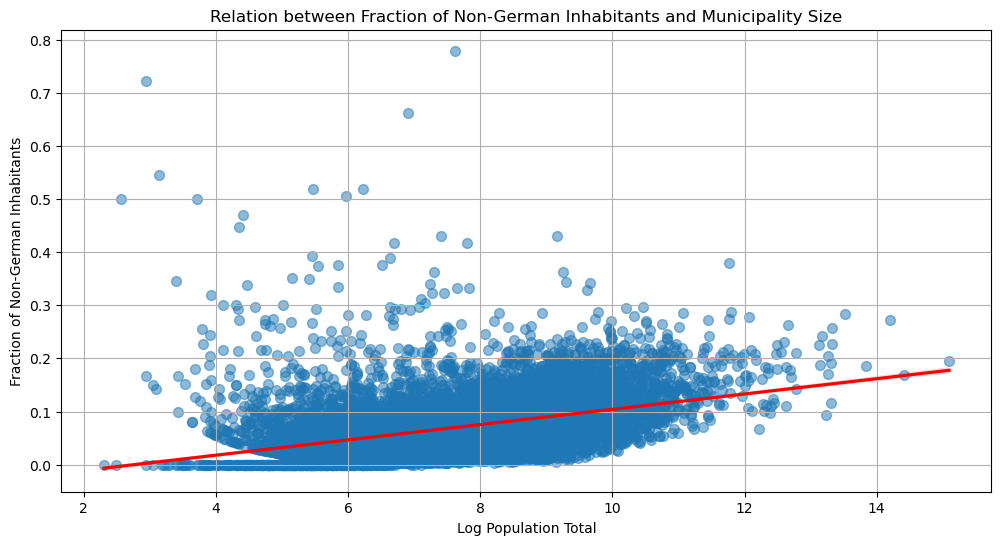

In [230]:
#Aggregate the population size by citizenship_2 
total_pop_c2 = processed_data.groupby(['name','population_total'])['citizenship_2'].mean().reset_index()
total_pop_c2['log_population_total'] = np.log1p(total_pop_c2['population_total'])
total_pop_c2['non_german_fraction'] = total_pop_c2['citizenship_2'] / total_pop_c2['population_total']

# Scatter Plot with Regression Line
plt.figure(figsize=(12, 6))
sns.regplot(x='log_population_total', y='non_german_fraction', data=total_pop_c2, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Relation between Fraction of Non-German Inhabitants and Municipality Size')
plt.xlabel('Log Population Total')
plt.ylabel('Fraction of Non-German Inhabitants')
plt.grid(True)
plt.show()


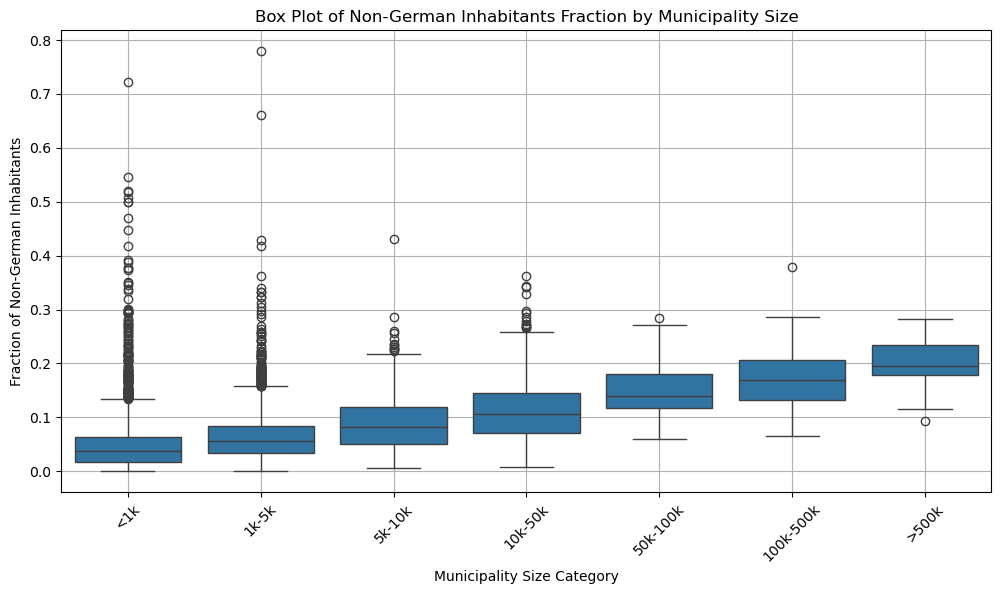

In [231]:
# Assuming total_pop_c2 is already defined as per the previous steps
# Define size categories based on raw population_total
bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, total_pop_c2['population_total'].max()]
labels = ['<1k', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k', '>500k']
total_pop_c2['size_category'] = pd.cut(total_pop_c2['population_total'], bins=bins, labels=labels, include_lowest=True)

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='size_category', y='non_german_fraction', data=total_pop_c2)
plt.title('Box Plot of Non-German Inhabitants Fraction by Municipality Size')
plt.xlabel('Municipality Size Category')
plt.ylabel('Fraction of Non-German Inhabitants')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True)
plt.show()

From these analysis, we can see that as the size of municipality increase, the freaction of Non-German Inhabitants increases as well. 


(c) Similarly, analyze and visualize the relation between the fraction of women (or men) and municipality size. (2 charts)

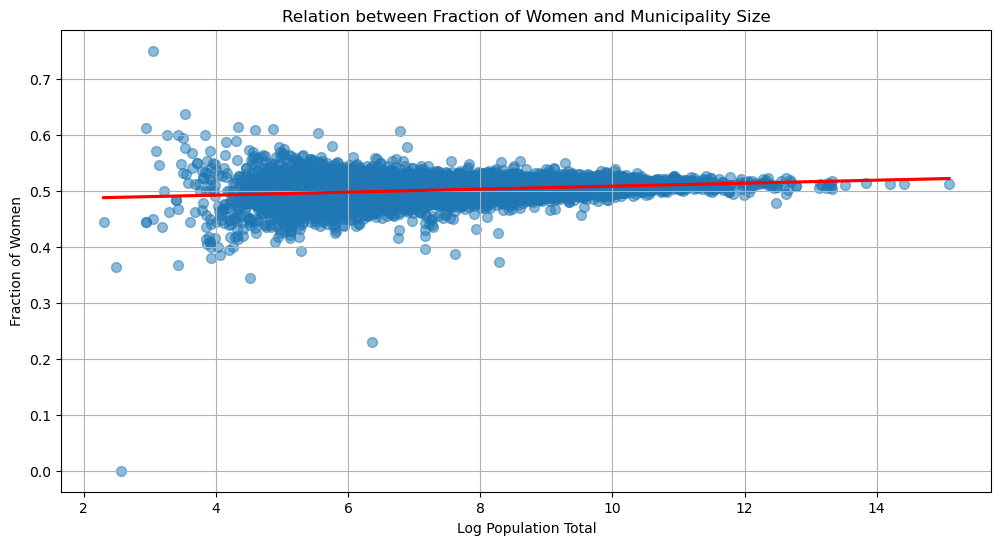

In [232]:
total_pop_women = processed_data.groupby(['name','population_total'])['Sex_2'].mean().reset_index()
total_pop_women.sort_values(by = 'Sex_2', ascending = True, inplace = True)
total_pop_women['log_population_total'] = np.log1p(total_pop_women['population_total'])

total_pop_women['women_fraction'] = total_pop_women["Sex_2"] / total_pop_women['population_total']

# Scatter Plot with Regression Line
plt.figure(figsize=(12, 6))
sns.regplot(x='log_population_total', y='women_fraction', data=total_pop_women, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Relation between Fraction of Women and Municipality Size')
plt.xlabel('Log Population Total')
plt.ylabel('Fraction of Women')
plt.grid(True)
plt.show()

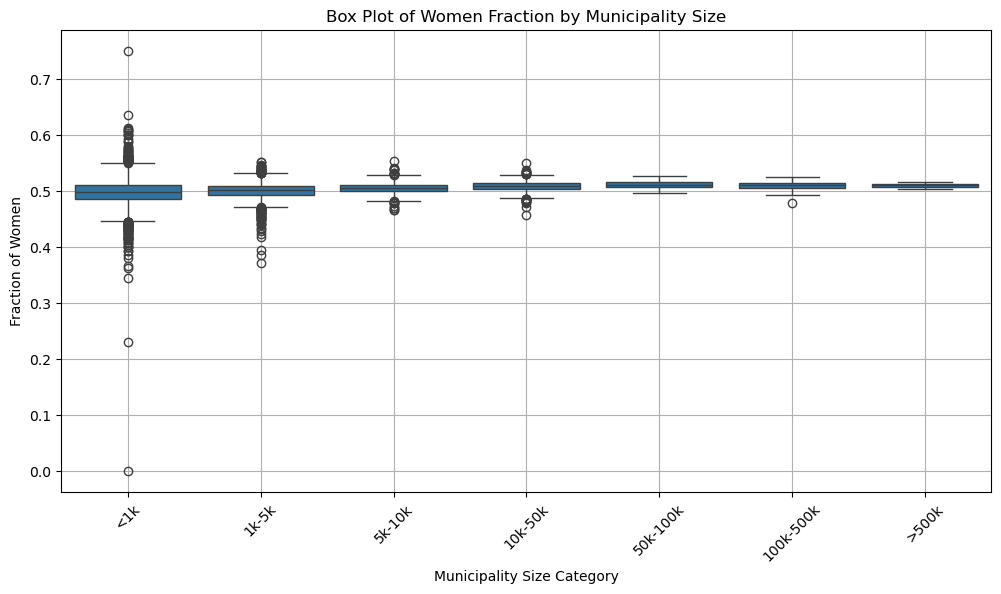

In [233]:
# Assuming total_pop_c2 is already defined as per the previous steps
# Define size categories based on raw population_total
bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, total_pop_women['population_total'].max()]
labels = ['<1k', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k', '>500k']
total_pop_women['size_category'] = pd.cut(total_pop_women['population_total'], bins=bins, labels=labels, include_lowest=True)

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='size_category', y='women_fraction', data=total_pop_women)
plt.title('Box Plot of Women Fraction by Municipality Size')
plt.xlabel('Municipality Size Category')
plt.ylabel('Fraction of Women')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True)
plt.show()

It shows, that we don't have any strong correlation between the size of the municipality and women's population. The graph represents woman being 50% of the total population.

## 3. **Relation between old age, fraction of women, and fraction of widowers.** Analyze and visualize the relation between the fraction of people aged 75 or older, the fraction of women, and the fraction of widowers, over the set of municipalities. What is the relation between the three quantities? (3-4 charts)

In [234]:
# Group and aggregate by municipality if necessary
municipality_data = processed_data.groupby('name').agg({
    'age_bracket_11': 'mean',  # Assuming data needs to be averaged; adjust according to your data
    'Sex_2': 'mean',
    'marital_status_3': 'mean',
    'population_total': 'mean'  # Total population might be useful for size categorization
}).reset_index()
municipality_data['fraction_75_plus'] = municipality_data['age_bracket_11'] / municipality_data['population_total']
municipality_data['fraction_women'] = municipality_data['Sex_2'] / municipality_data['population_total']
municipality_data['fraction_widow'] = municipality_data['marital_status_3'] / municipality_data['population_total']
municipality_data['log_population_total'] = np.log1p(municipality_data['population_total'])
municipality_data

,name,age_bracket_11,Sex_2,marital_status_3,population_total,fraction_75_plus,fraction_women,fraction_widow,log_population_total
0,Aach,109.0,576.0,56.0,1096.0,0.099453,0.525547,0.051095,7.000334
1,"Aach, Stadt",163.0,1137.0,111.0,2285.0,0.071335,0.497593,0.048578,7.734559
2,"Aachen, Stadt",24661.0,125082.0,13887.0,261178.0,0.094422,0.478915,0.053171,12.472961
3,"Aalen, Stadt",7427.0,33733.0,4620.0,67139.0,0.110621,0.502435,0.068812,11.114535
4,Aarbergen,702.0,3170.0,501.0,6225.0,0.112771,0.509237,0.080482,8.736489
...,...,...,...,...,...,...,...,...,...
10410,Üdersdorf,114.0,555.0,86.0,1094.0,0.104205,0.507313,0.078611,6.998510
10411,Ühlingen-Birkendorf,545.0,2573.0,339.0,5203.0,0.104747,0.494522,0.065155,8.557183
10412,Ürzig,129.0,451.0,81.0,877.0,0.147092,0.514253,0.092360,6.777647
10413,Üttfeld,57.0,194.0,31.0,397.0,0.143577,0.488665,0.078086,5.986452


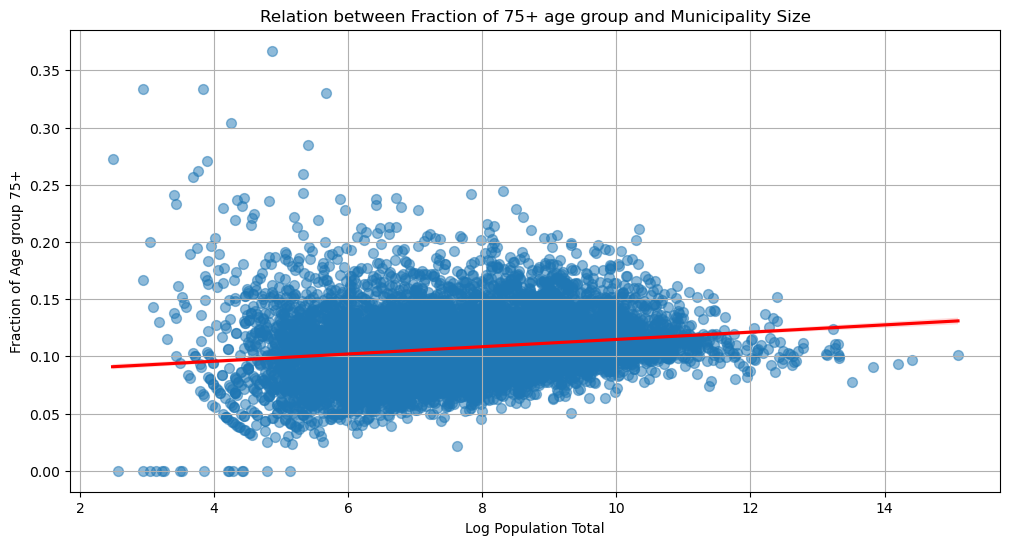

In [235]:
# Scatter Plot with Regression Line
plt.figure(figsize=(12, 6))
sns.regplot(x='log_population_total', y='fraction_75_plus', data=municipality_data, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Relation between Fraction of 75+ age group and Municipality Size')
plt.xlabel('Log Population Total')
plt.ylabel('Fraction of Age group 75+')
plt.grid(True)
plt.show()

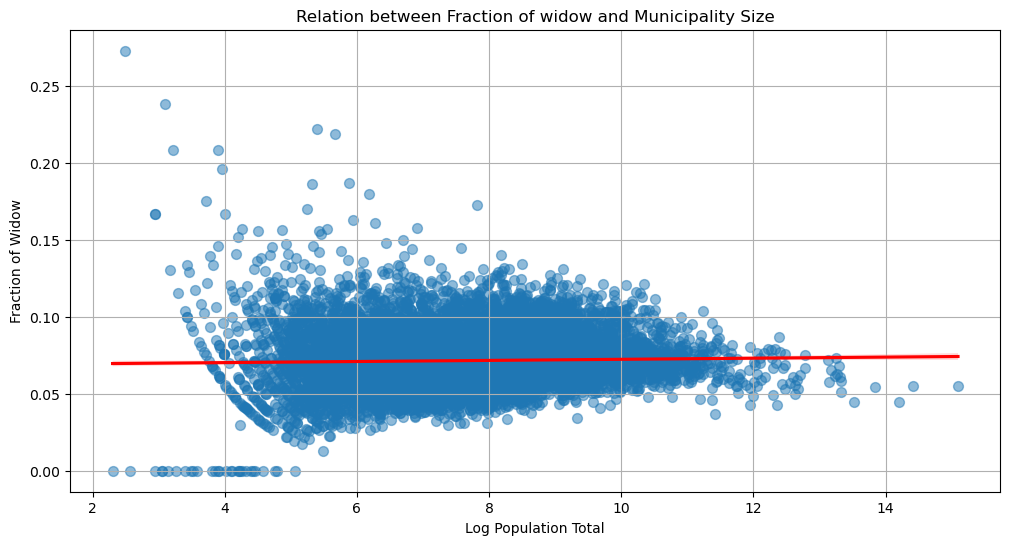

In [236]:
# Scatter Plot with Regression Line
plt.figure(figsize=(12, 6))
sns.regplot(x='log_population_total', y='fraction_widow', data=municipality_data, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Relation between Fraction of widow and Municipality Size')
plt.xlabel('Log Population Total')
plt.ylabel('Fraction of Widow')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

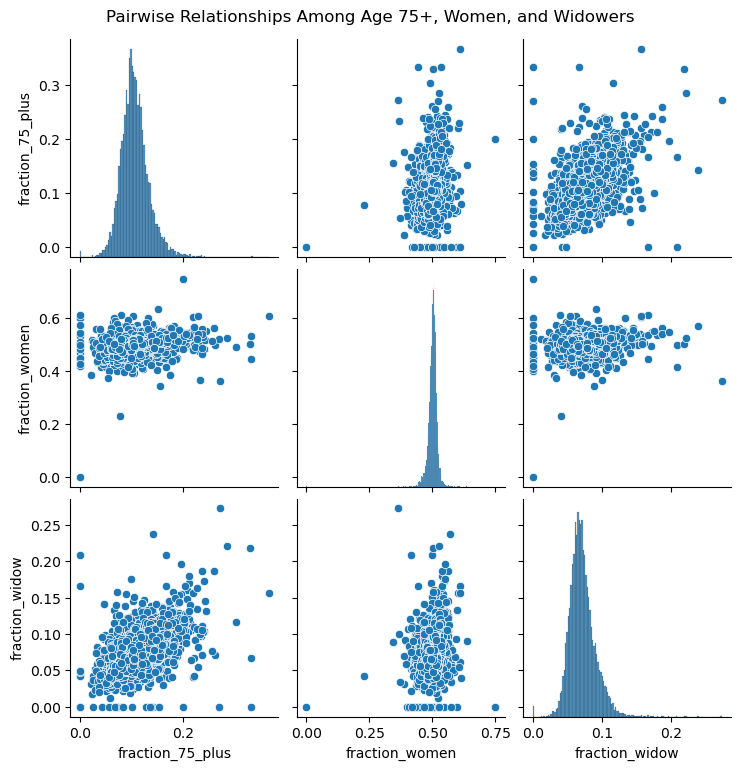

In [237]:
plt.figure(figsize=(12, 6))
sns.pairplot(municipality_data[['fraction_75_plus', 'fraction_women', 'fraction_widow']])
plt.suptitle('Pairwise Relationships Among Age 75+, Women, and Widowers', y=1.02)
plt.show()

2 trends are visible from the charts, 
1. The number of people in the age group 75+ increases as the population size increases. There is a very slight positive relationship between the two.
2. As the People aged 75+ increase, the number of widows also increases, this is a clear positive linear trend.

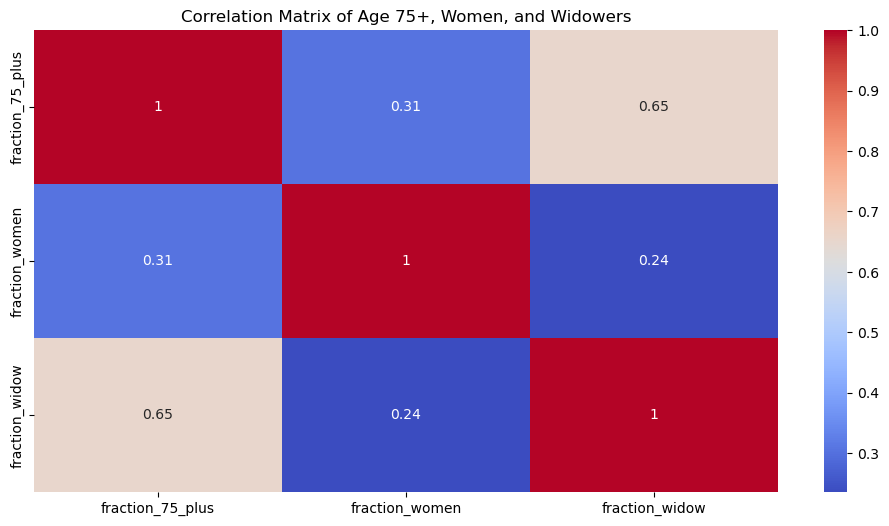

In [238]:
plt.figure(figsize=(12, 6))
municipality_data.dropna(inplace=True)
corr_matrix = municipality_data[['fraction_75_plus', 'fraction_women', 'fraction_widow']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Age 75+, Women, and Widowers')
plt.show()


## 4. **Dimensionality reduction with respect to age distribution.**


(a) Add new columns to the original dataset that contain the cumulative age distribution, i.e. add columns ```age_cumul_xx``` for ```xx ∈ {01, . . . , 11}``` that contain the relative cumulative number of people in age brackets 01 to xx in a given municipality (in particular ```age_cumul_11``` should always have value 1).

In [239]:
# Load the cleaned data with the correct delimiter
df_municipalities = pd.read_csv('cleaned_census_data.csv', delimiter=',')

# Calculate cumulative age distributions
age_bracket_columns = ['age_bracket_01', 'age_bracket_02', 'age_bracket_03',
                       'age_bracket_04', 'age_bracket_05', 'age_bracket_06',
                       'age_bracket_07', 'age_bracket_08', 'age_bracket_09',
                       'age_bracket_10', 'age_bracket_11']

for i in range(1, 12):
    df_municipalities[f'age_cumul_{i:02d}'] = df_municipalities[age_bracket_columns[:i]].sum(axis=1) / df_municipalities['population_total']


(b) Perform principal component analysis on the variables

(age_cumul_01, . . . , age_cumul_11).



In [240]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Perform PCA
features = [f'age_cumul_{i:02d}' for i in range(1, 12)]
X = df_municipalities[features].dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
pca_results = pca.fit_transform(X_scaled)

# Create a DataFrame containing the principal components
pca_df = pd.DataFrame(data = pca_results,
                      columns = [f'Principal Component {i}' for i in range(1, len(age_cumul_columns)+1)])

# Save PCA results for further analysis
pca_df = pd.DataFrame(pca_results, columns=[f'PC{i+1}' for i in range(11)])
pca_df['name'] = df['name']
pca_df.to_csv('pca_results.csv', index=False)
print("PCA results saved to 'pca_results.csv'")


PCA results saved to 'pca_results.csv'



(c) Show the explained variance of each eigenvector and the cumulative variance of the
first k eigenvectors with respect to k ∈ {1, 2, . . .}. Visualize the first two eigenvectors and give a brief interpretation. (one sentence per eigenvector, 2-3 charts)

Explained Vairance: 
[0.64231777 0.13660981 0.07690179 0.05998087 0.03632495 0.01748465
 0.01018825 0.00826618 0.00540037 0.00387234 0.00265303]
Cummulative Variance: 
[0.64231777 0.77892758 0.85582937 0.91581023 0.95213518 0.96961983
 0.97980808 0.98807426 0.99347463 0.99734697 1.        ]


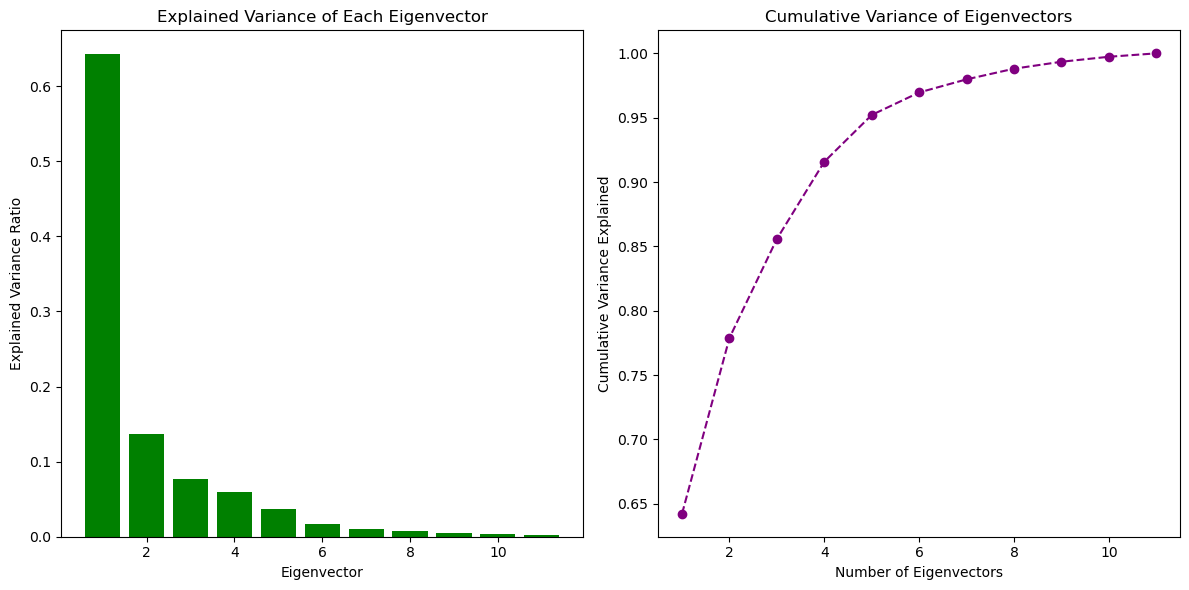

In [241]:
# Explained variance by each component
explained_variances = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variances = np.cumsum(explained_variances)

print('Explained Vairance: \n' + str(explained_variances))
print('Cummulative Variance: \n' + str(cumulative_variances))

# Plot explained variance
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variances) + 1), explained_variances, color='green')
plt.xlabel('Eigenvector')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of Each Eigenvector')

# Plot cumulative variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variances) + 1), cumulative_variances, marker='o', linestyle='--', color='purple')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance of Eigenvectors')

plt.tight_layout()
plt.show()


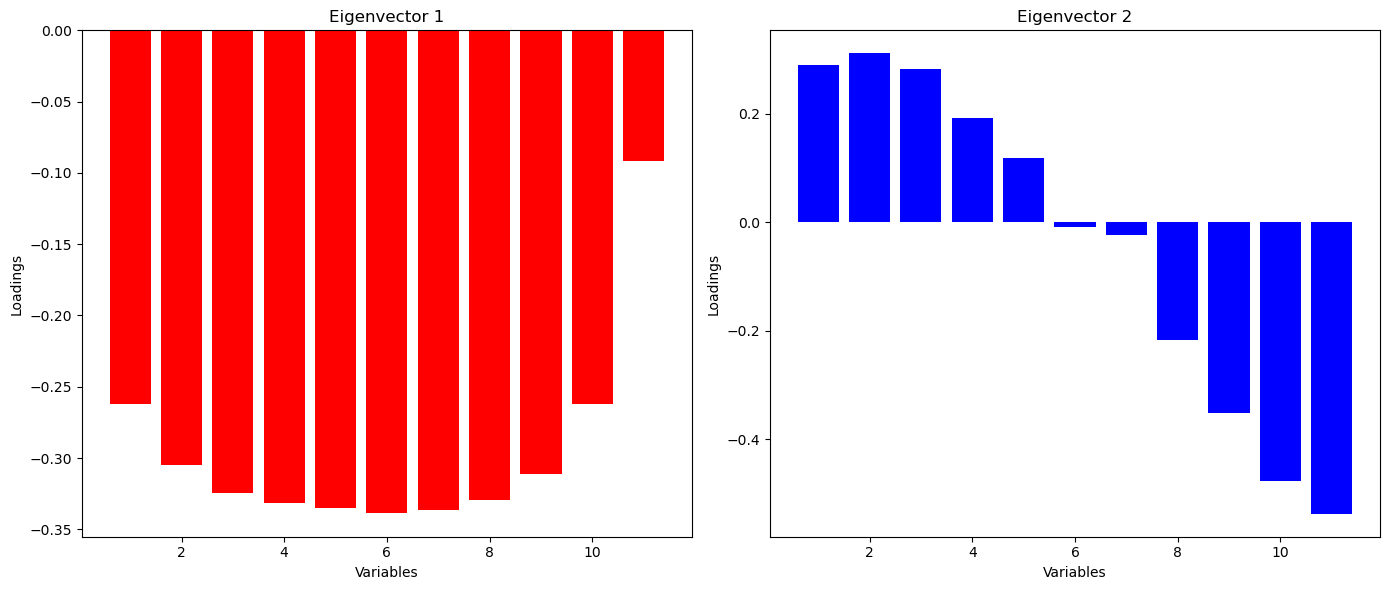

In [242]:
# Visualization of the first two principal components
plt.figure(figsize=(14, 6))

# Component 1
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.components_[0]) + 1), pca.components_[0], color='red')
plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.title('Eigenvector 1')

# Component 2
plt.subplot(1, 2, 2)
plt.bar(range(1, len(pca.components_[1]) + 1), pca.components_[1], color='blue')
plt.xlabel('Variables')
plt.ylabel('Loadings')
plt.title('Eigenvector 2')

plt.tight_layout()
plt.show()

1. The first eigen vector has all the loadings values negative, which means that the eigen vector has negative correlation with all the 11 variables.
2. For eigen vector 2 half of the variables have negative loadings while the other half has positive, which implies that it has both negative and positive relationship with the variables.

(d) Show a scatter plot of the 2d PCA embedding of the municipalities, i.e. their projection to the two leading eigenvectors. Which PCA coordinate is correlated strongly with the fraction of people aged 75 or older? Confirm this visually. (2 charts)


Original data shape: (10786, 12)
Cleaned data shape: (10768, 3)


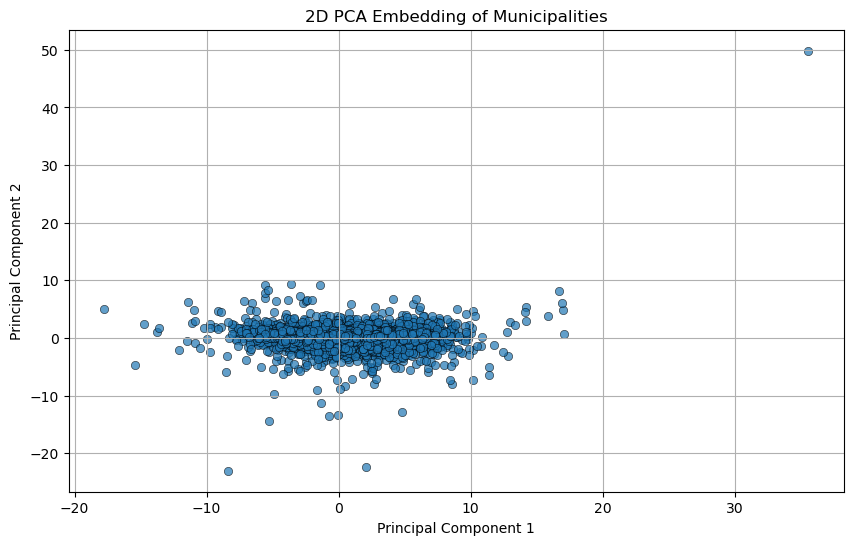

Correlation between PC1 and fraction of 75+: 0.6605
Correlation between PC2 and fraction of 75+: 0.2966

PC1 is more strongly correlated with the fraction of people aged 75 or older.
Correlation coefficient: 0.6605


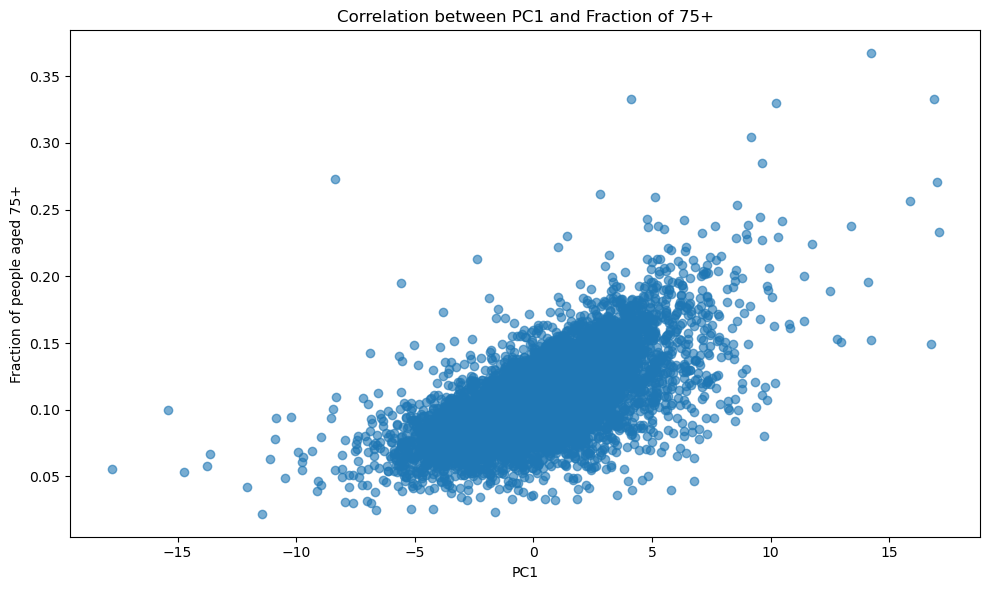

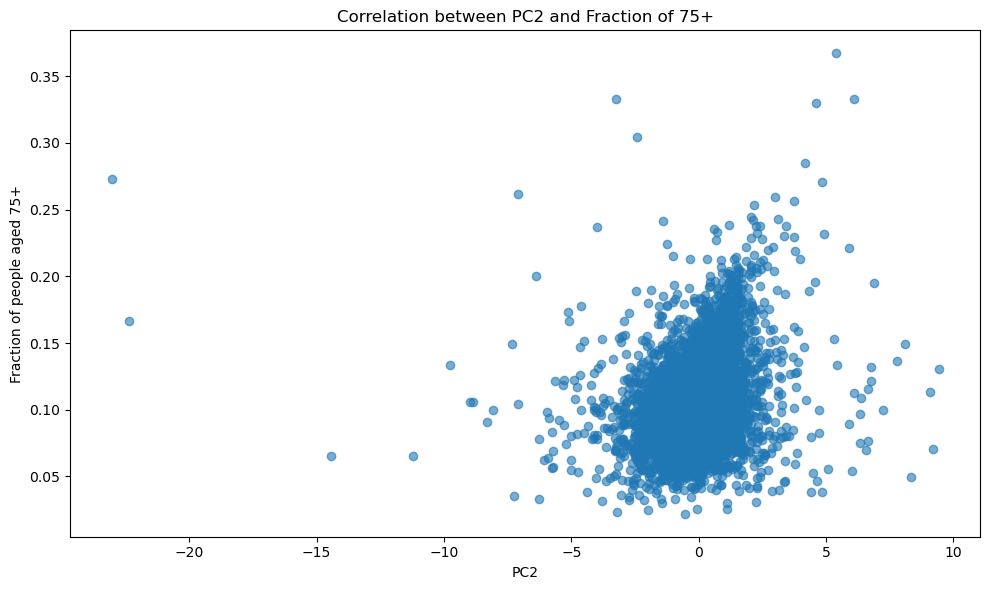

In [245]:
# Load PCA results and original data
pca_results = pd.read_csv('pca_results.csv')
original_data = pd.read_csv('cleaned_census_data.csv', delimiter=',')

# Calculate fraction of people aged 75 or older
original_data['fraction_75_plus'] = original_data['age_bracket_11'] / original_data['population_total']

# Combine data and remove rows with NaN or infinite values
combined_data = pd.concat([pca_results[['PC1', 'PC2']], original_data['fraction_75_plus']], axis=1)
combined_data = combined_data.replace([np.inf, -np.inf], np.nan).dropna()

print(f"Original data shape: {pca_results.shape}")
print(f"Cleaned data shape: {combined_data.shape}")

# Assuming 'pca_df' already contains the PCA components
# Add municipality data to pca_df if not already present
pca_df['municipality'] = municipality_data['name']  # Uncomment if municipalities are needed

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7, edgecolor='k')
plt.title('2D PCA Embedding of Municipalities')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Calculate correlations
corr_pc1, _ = pearsonr(combined_data['PC1'], combined_data['fraction_75_plus'])
corr_pc2, _ = pearsonr(combined_data['PC2'], combined_data['fraction_75_plus'])

print(f"Correlation between PC1 and fraction of 75+: {corr_pc1:.4f}")
print(f"Correlation between PC2 and fraction of 75+: {corr_pc2:.4f}")

# Determine which PC is more strongly correlated
strong_pc = 'PC1' if abs(corr_pc1) > abs(corr_pc2) else 'PC2'
strong_corr = max(abs(corr_pc1), abs(corr_pc2))

print(f"\n{strong_pc} is more strongly correlated with the fraction of people aged 75 or older.")
print(f"Correlation coefficient: {strong_corr:.4f}")

# Visualize the correlation
plt.figure(figsize=(10, 6))
plt.scatter(combined_data[strong_pc], combined_data['fraction_75_plus'], alpha=0.6)
plt.xlabel(strong_pc)
plt.ylabel('Fraction of people aged 75+')
plt.title(f'Correlation between {strong_pc} and Fraction of 75+')
plt.tight_layout()
plt.show()

# Visualize the correlation
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['PC2'], combined_data['fraction_75_plus'], alpha=0.6)
plt.xlabel('PC2')
plt.ylabel('Fraction of people aged 75+')
plt.title(f'Correlation between PC2 and Fraction of 75+')
plt.tight_layout()
plt.show()

According to the graph and correlation matrix it can be said that the principal component 1 is strongly correlated to fraction of people aged 75+, the value of correlation is 0.6605.